# Libraries

In [ ]:
#mounting with the google drive
from google.colab import drive
drive.mount('/content/drive/')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib.colors import ListedColormap
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler


#for spliting the datasets
from sklearn.model_selection import train_test_split


#for sampling
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE


#for evalutaion
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss


#for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install catboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Functions

In [ ]:
# Feature importance
def feature_importance(model):
  importance = model.feature_importances_
  # plot feature importance
  figure(figsize=(8, 6), dpi=80)
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()

In [ ]:
# confusion matrix drawing
def draw_confusion_matrix(cf_matrix):
  sns.set(rc = {'figure.figsize':(3,2)})
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

  ax.set_title('Confusion Matrix');
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
# gets the AUC_SCORE
def auc_score(y,pred):
  fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
  print("AUC_SCORE: ",metrics.auc(fpr, tpr))

In [ ]:
def classification(X_train, y_train, X_val, y_val):
  #logistic regression
  classifier1 = LogisticRegression()
  print("                                   Logistic Regression")
  classifier1.fit(X_train, y_train)
  train_prediction = classifier1.predict(X_train)
  test_prediction = classifier1.predict(X_val)
  print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
  print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier1.predict_proba(X_train)[:, 1]))
  auc_score(y_train,train_prediction)
  print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
  print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
  print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier1.predict_proba(X_val)[:, 1]))
  auc_score(y_val,test_prediction)
  print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))

  print("\n\n\n\n")

  #Random Forest Classification
  classifier2 = RandomForestClassifier(n_estimators=300)
  print("                                   Random Forest Classification: ")
  classifier2.fit(X_train, y_train)
  train_prediction = classifier2.predict(X_train)
  test_prediction = classifier2.predict(X_val)
  print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
  print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier2.predict_proba(X_train)[:, 1]))
  auc_score(y_train,train_prediction)
  print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
  print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
  print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier2.predict_proba(X_val)[:, 1]))
  auc_score(y_val,test_prediction)
  print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))
  feature_importance(classifier2)
  print("\n\n\n\n")

  #XGBoost Classification
  classifier3 = xgb.XGBClassifier()
  print("                                   XGBoost Classification: ")
  classifier3.fit(X_train, y_train)
  train_prediction = classifier3.predict(X_train)
  test_prediction = classifier3.predict(X_val)
  print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
  print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier3.predict_proba(X_train)[:, 1]))
  auc_score(y_train,train_prediction)
  print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
  print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
  print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier3.predict_proba(X_val)[:, 1]))
  auc_score(y_val,test_prediction)
  print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))
  feature_importance(classifier3)
  print("\n\n\n\n")

  #AdaBoost Classification
  classifier4 = AdaBoostClassifier(n_estimators=100)
  print("                                   AdaBoost Classification: ")
  classifier4.fit(X_train, y_train)
  train_prediction = classifier4.predict(X_train)
  test_prediction = classifier4.predict(X_val)
  print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
  print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier4.predict_proba(X_train)[:, 1]))
  auc_score(y_train,train_prediction)
  print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
  print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
  print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier4.predict_proba(X_val)[:, 1]))
  auc_score(y_val,test_prediction)
  print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))
  feature_importance(classifier4)
  print("\n\n\n\n")

  #Extra Trees Classification
  classifier5 = ExtraTreesClassifier()
  print("                                   Extra Trees Classification: ")
  classifier5.fit(X_train, y_train)
  train_prediction = classifier5.predict(X_train)
  test_prediction = classifier5.predict(X_val)
  print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
  print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier5.predict_proba(X_train)[:, 1]))
  auc_score(y_train,train_prediction)
  print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
  print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
  print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier5.predict_proba(X_val)[:, 1]))
  auc_score(y_val,test_prediction)
  print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))
  feature_importance(classifier5)
  print("\n\n\n\n")

  #Decision Tree Classification
  classifier6 = DecisionTreeClassifier()
  print("                                   Decision Tree Classification: ")
  classifier6.fit(X_train, y_train)
  train_prediction = classifier6.predict(X_train)
  test_prediction = classifier6.predict(X_val)
  print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
  print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier6.predict_proba(X_train)[:, 1]))
  auc_score(y_train,train_prediction)
  print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
  print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
  print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier6.predict_proba(X_val)[:, 1]))
  auc_score(y_val,test_prediction)
  print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))
  feature_importance(classifier6)
  print("\n\n\n\n")

  #Decision Tree Classification
  classifier7 = CatBoostClassifier(logging_level='Silent')
  print("                                   CatBoost Classification: ")
  classifier7.fit(X_train, y_train)
  train_prediction = classifier7.predict(X_train)
  test_prediction = classifier7.predict(X_val)
  print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
  print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier7.predict_proba(X_train)[:, 1]))
  auc_score(y_train,train_prediction)
  print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
  print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
  print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier7.predict_proba(X_val)[:, 1]))
  auc_score(y_val,test_prediction)
  print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))
  feature_importance(classifier7)
  print("\n\n\n\n")

  #LightGBM Classification
  classifier8 = lgb.LGBMClassifier()
  print("                                   LightGBM Classification: ")
  classifier8.fit(X_train, y_train)
  train_prediction = classifier8.predict(X_train)
  test_prediction = classifier8.predict(X_val)
  print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
  print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier8.predict_proba(X_train)[:, 1]))
  auc_score(y_train,train_prediction)
  print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
  print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
  print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier8.predict_proba(X_val)[:, 1]))
  auc_score(y_val,test_prediction)
  print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
  draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))
  feature_importance(classifier8)
  print("\n")

# Train

In [ ]:
#reading the train dataset 
train = pd.read_csv("/content/drive/MyDrive/COMPETITIONS/Robi Datathon 2.0/Data/train.csv.zip")
print(train.shape,"\n")
print(train.columns,"\n")
train.head()

(28322, 36) 

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's54', 's55', 's56', 's57', 's58', 's59', 's69', 's70', 's71',
       'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
       'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object') 



,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [ ]:
#checking the null values in train dataset
train.isna().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

In [ ]:
#cheking the unique values and datatypes of the sNUMBER columns
s = [11,12,13,16,17,18,48,52,53,54,55,56,57,58,59,69,70,71]
for i in s:
  S = 's'+str(i)
  print("test-",S,": ", train[S].unique(), " ", train[S].dtypes)

test- s11 :  ['Y' 'N']   object
test- s12 :  ['N' 'Y']   object
test- s13 :  [1 0]   int64
test- s16 :  ['D' 'B' 'C' 'A']   object
test- s17 :  ['D' 'C' 'B' 'A']   object
test- s18 :  ['B' 'D' 'C' 'A']   object
test- s48 :  [0 1]   int64
test- s52 :  ['1' 'l' '0' 'o']   object
test- s53 :  ['  ' ' ']   object
test- s54 :  [nan 'b2' 'aa' '22' '2a' '2b' 'a2' 'bb' 'ab' 'ba']   object
test- s55 :  ['kK' nan 'kk' '2K' 'k2' 'KK' '22' 'K2' '2k' 'Kk']   object
test- s56 :  [nan]   float64
test- s57 :  [nan]   float64
test- s58 :  ['B' 'A']   object
test- s59 :  [nan]   float64
test- s69 :  ['x' '~1' 'C`' '0']   object
test- s70 :  ['op: D' 'op: C' 'op: B' 'op: A']   object
test- s71 :  ['b' 'd' 'c' 'a']   object


In [ ]:
#checking the unique values and datatypes of the nNUMBER columns
for i in range(1,16):
  N = "n" + str(i)
  print("test-",N,": ", train[N].unique()," ", train[N].dtypes, "\n")

test- n1 :  [16.14466597  7.14455819  6.92323603 ... 13.42979701 16.09462206
  7.05810713]   float64 

test- n2 :  [1.98944148 0.8448659  1.04201802 ... 1.80056198 2.43828046 1.02317194]   float64 

test- n3 :  [2 3 6 9 7 8 4 0 5 1]   int64 

test- n4 :  [2.31838468 6.19776785 7.82440091 ... 7.76338648 6.94276637 5.94202455]   float64 

test- n5 :  [-32.83927744 -32.5765972  -32.51054438 ... -32.57597474 -32.57756295
 -32.84889674]   float64 

test- n6 :  [0.01717551 0.01385715 0.01394339 ... 0.01778231 0.00732437 0.01592836]   float64 

test- n7 :  [-9.12605619 -9.09828731 -9.2348943  ... -9.23372167 -8.74894117
 -9.28094998]   float64 

test- n8 :  [1.73229112 1.50588495 1.50382812 ... 1.45591114 2.07439439 1.49047818]   float64 

test- n9 :  [ 3.69850365  6.79135689  4.10968506 ...  2.90024887 10.67325854
  3.56959828]   float64 

test- n10 :  [ 4.80451719  6.11041593  3.95322561 ...  6.05868135 11.38764584
  4.58496706]   float64 

test- n11 :  [1.54448412 1.71235408 1.80426032 ...

In [ ]:
# Label Encoding

#gender 
mapping1 = {"M":1, "F":0}
train["gender"].replace(mapping1, inplace = True)

#s11, s12
mapping2 = {'Y':1 , 'N':0  }
train['s11'].replace(mapping2,inplace = True)
train['s12'].replace(mapping2,inplace = True)

#s16, s17, s18
mapping3 = {'B':4,'D':3,'A':2,'C':2}
s = [16, 17,18]
for i in s:
  S= 's'+str(i)
  train[S].replace(mapping3, inplace =True)

#s52
mapping4 ={'1':3 ,'l':2, '0':1, 'o':1}
train['s52'].replace(mapping4, inplace=True)

#s58
mapping5= {"B":1, "A":0}
train['s58'].replace(mapping5, inplace = True)

#s69
mapping6 ={'x':3, '~1':2, 'C`':1, '0':1}
train['s69'].replace(mapping6,inplace = True)

#s70
mapping7 = {'op: D':3, 'op: C':2, 'op: B':1, 'op: A':1}
train['s70'].replace(mapping7, inplace= True)

#s71
mapping8 ={'b':3, 'd':2, 'c':1, 'a':1}
train['s71'].replace(mapping8, inplace =True)

In [ ]:
# Dropping Null Columns
s = [53, 54, 55, 56, 57, 59]
for i in s:
  S = 's'+str(i)
  train.drop([S], axis=1, inplace=True)

In [ ]:
# Dropping id Column in train dataset
train.drop(["id"], axis=1, inplace = True)

In [ ]:
#checking the value counts
train["label"].value_counts()

0    23562
1     4760
Name: label, dtype: int64

In [ ]:
train["Label"] = train["label"]
train.drop(["label"], axis = 1, inplace = True)

In [ ]:
train.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,Label
0,1,1,0,1,3,3,4,0,3,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,1,1,1,1,3,3,4,1,3,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,1,1,1,1,3,3,4,0,3,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,0,1,1,1,3,3,4,0,3,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,1,0,1,1,4,3,3,1,2,1,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


# Oversampling + Classical Models Training

In [ ]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.25, random_state=0)

#oversampling the dataset as the given dataset is highly imbalanced
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

                                   Logistic Regression
Logloss for Train:  7.396348999913883
ROC_AUC Score for Train:  0.8623350286603142
AUC_SCORE:  0.7858558405526301
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.77      0.82      0.79     17661
           1       0.81      0.75      0.78     17661

    accuracy                           0.79     35322
   macro avg       0.79      0.79      0.79     35322
weighted avg       0.79      0.79      0.79     35322



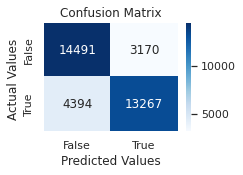

Logloss for Validation:  6.760574105312001
ROC_AUC Score for Validation:  0.8567416036925657
AUC_SCORE:  0.7862870125431197
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      5901
           1       0.45      0.76      0.56      1180

    accuracy                           0.80      7081
   macro avg       0.70      0.79      0.72      7081
weighted avg       0.86      0.80      0.82      7081



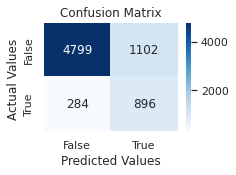






                                   Random Forest Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  1.0
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17661
           1       1.00      1.00      1.00     17661

    accuracy                           1.00     35322
   macro avg       1.00      1.00      1.00     35322
weighted avg       1.00      1.00      1.00     35322



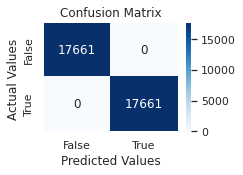

Logloss for Validation:  4.23385287145393
ROC_AUC Score for Validation:  0.861854210288977
AUC_SCORE:  0.740004566878926
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      5901
           1       0.66      0.53      0.59      1180

    accuracy                           0.88      7081
   macro avg       0.79      0.74      0.76      7081
weighted avg       0.87      0.88      0.87      7081



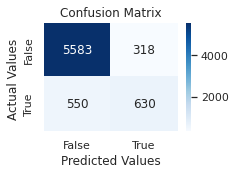

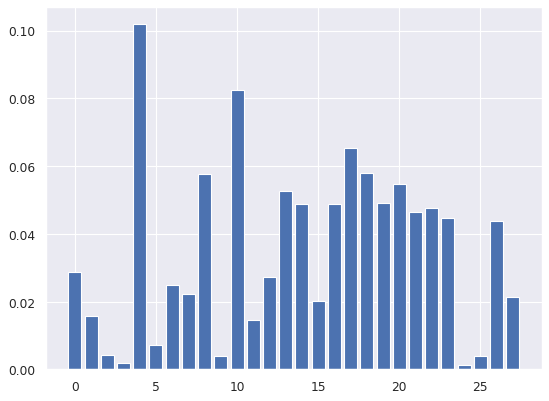






                                   XGBoost Classification: 
Logloss for Train:  6.464472544440525
ROC_AUC Score for Train:  0.8940248231962356
AUC_SCORE:  0.812836192741068
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.80      0.84      0.82     17661
           1       0.83      0.78      0.81     17661

    accuracy                           0.81     35322
   macro avg       0.81      0.81      0.81     35322
weighted avg       0.81      0.81      0.81     35322



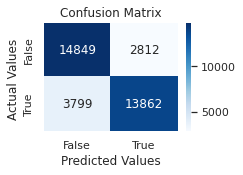

Logloss for Validation:  6.263040769225425
ROC_AUC Score for Validation:  0.8694231658523836
AUC_SCORE:  0.7962856051401802
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.95      0.83      0.88      5901
           1       0.47      0.76      0.58      1180

    accuracy                           0.82      7081
   macro avg       0.71      0.80      0.73      7081
weighted avg       0.87      0.82      0.83      7081



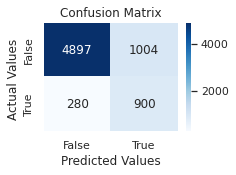

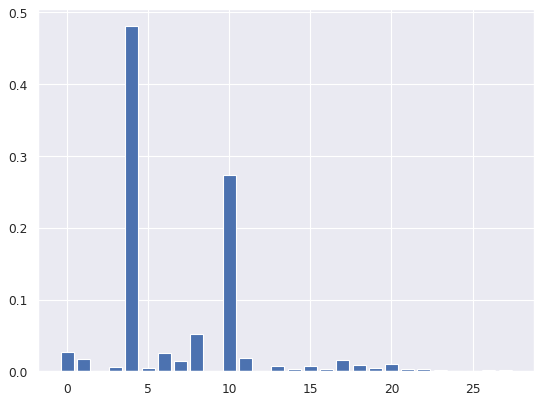






                                   AdaBoost Classification: 
Logloss for Train:  6.822359620841396
ROC_AUC Score for Train:  0.884190749447981
AUC_SCORE:  0.8024743785742597
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.78      0.83      0.81     17661
           1       0.82      0.77      0.80     17661

    accuracy                           0.80     35322
   macro avg       0.80      0.80      0.80     35322
weighted avg       0.80      0.80      0.80     35322



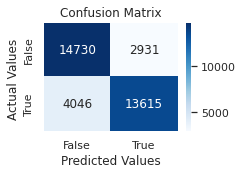

Logloss for Validation:  6.4044957764550965
ROC_AUC Score for Validation:  0.8636264608986125
AUC_SCORE:  0.7917944100253045
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      5901
           1       0.47      0.76      0.58      1180

    accuracy                           0.81      7081
   macro avg       0.70      0.79      0.73      7081
weighted avg       0.86      0.81      0.83      7081



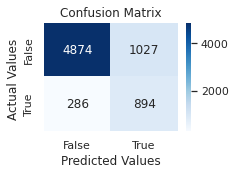

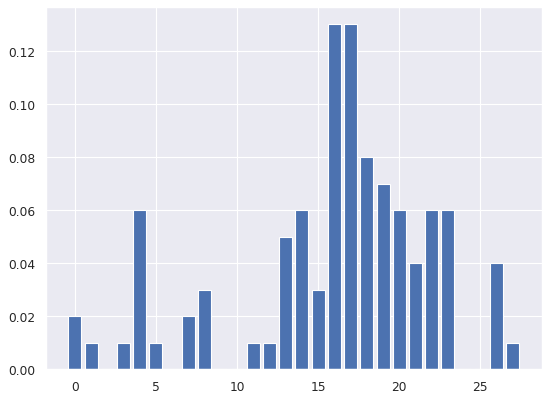






                                   Extra Trees Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  1.0
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17661
           1       1.00      1.00      1.00     17661

    accuracy                           1.00     35322
   macro avg       1.00      1.00      1.00     35322
weighted avg       1.00      1.00      1.00     35322



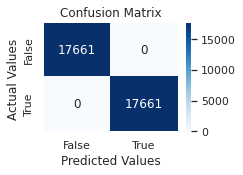

Logloss for Validation:  4.048487774109535
ROC_AUC Score for Validation:  0.8565162038034347
AUC_SCORE:  0.7150875749298453
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      5901
           1       0.74      0.46      0.57      1180

    accuracy                           0.88      7081
   macro avg       0.82      0.72      0.75      7081
weighted avg       0.87      0.88      0.87      7081



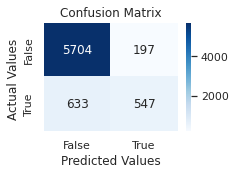

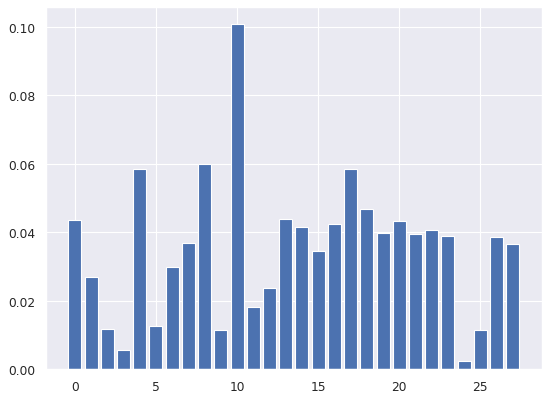






                                   Decision Tree Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  1.0
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17661
           1       1.00      1.00      1.00     17661

    accuracy                           1.00     35322
   macro avg       1.00      1.00      1.00     35322
weighted avg       1.00      1.00      1.00     35322



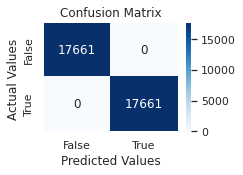

Logloss for Validation:  6.204467182360117
ROC_AUC Score for Validation:  0.6766193032493775
AUC_SCORE:  0.6766193032493775
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5901
           1       0.46      0.46      0.46      1180

    accuracy                           0.82      7081
   macro avg       0.68      0.68      0.68      7081
weighted avg       0.82      0.82      0.82      7081



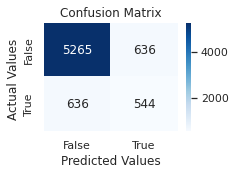

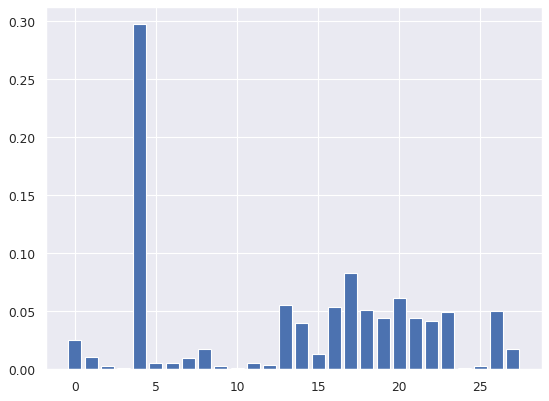






                                   CatBoost Classification: 
Logloss for Train:  2.4436209959088933
ROC_AUC Score for Train:  0.9773559163066303
AUC_SCORE:  0.9292508917954816
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     17661
           1       0.92      0.94      0.93     17661

    accuracy                           0.93     35322
   macro avg       0.93      0.93      0.93     35322
weighted avg       0.93      0.93      0.93     35322



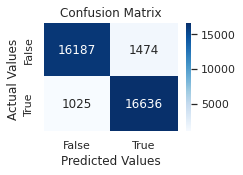

Logloss for Validation:  5.5313634971699255
ROC_AUC Score for Validation:  0.861760144072105
AUC_SCORE:  0.7791635430938163
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      5901
           1       0.51      0.69      0.59      1180

    accuracy                           0.84      7081
   macro avg       0.72      0.78      0.74      7081
weighted avg       0.86      0.84      0.85      7081



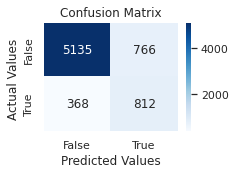

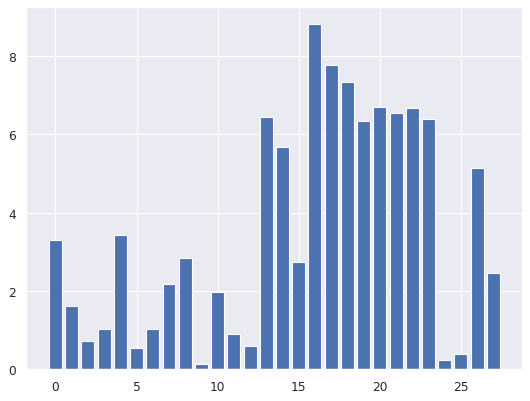






                                   LightGBM Classification: 
Logloss for Train:  4.277060819833686
ROC_AUC Score for Train:  0.9508292401214127
AUC_SCORE:  0.876167827416341
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     17661
           1       0.88      0.88      0.88     17661

    accuracy                           0.88     35322
   macro avg       0.88      0.88      0.88     35322
weighted avg       0.88      0.88      0.88     35322



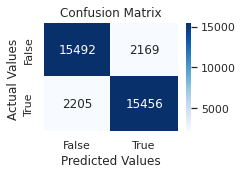

Logloss for Validation:  5.9362259719637755
ROC_AUC Score for Validation:  0.8658726329062297
AUC_SCORE:  0.7917926866747664
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      5901
           1       0.49      0.74      0.59      1180

    accuracy                           0.83      7081
   macro avg       0.72      0.79      0.74      7081
weighted avg       0.87      0.83      0.84      7081



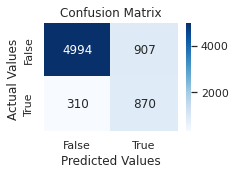

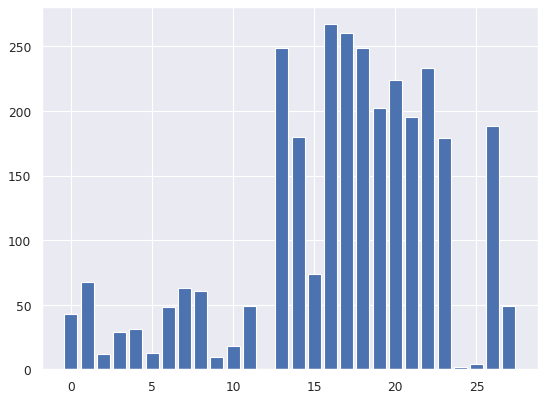

In [ ]:
classification(X_train, y_train, X_val, y_val)

# Outliers Removing + Oversampling + Classical Models Training

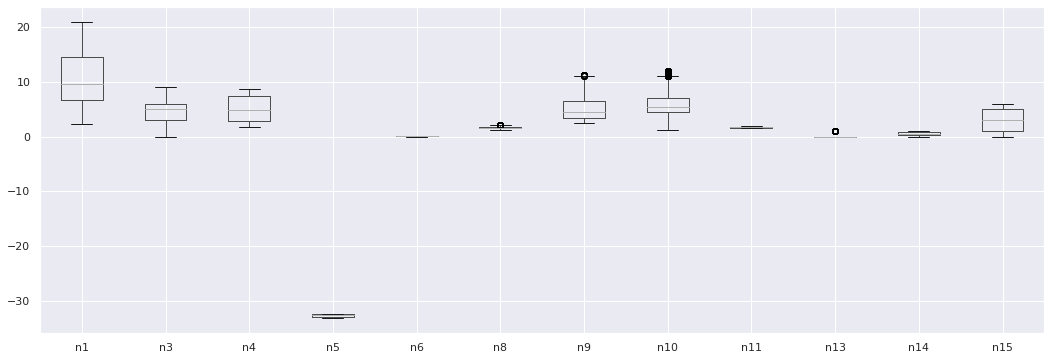

In [ ]:
#plotting boxplot
numerical_columns=['n1','n3', 'n4', 'n5', 'n6', 'n8', 'n9', 'n10', 'n11', 'n13', 'n14', 'n15']
train.boxplot(numerical_columns,figsize=(18,6))

In [ ]:
for x in numerical_columns:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

print(train.isnull().sum().sum())
train.dropna(axis=0,inplace=True)
print(train.isnull().sum().sum())

6363
0


In [ ]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.25, random_state=0)
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

                                   Logistic Regression
Logloss for Train:  7.4169848693464075
ROC_AUC Score for Train:  0.8620634264730668
AUC_SCORE:  0.7852584785258478
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.77      0.81      0.79     13947
           1       0.80      0.76      0.78     13947

    accuracy                           0.79     27894
   macro avg       0.79      0.79      0.79     27894
weighted avg       0.79      0.79      0.79     27894



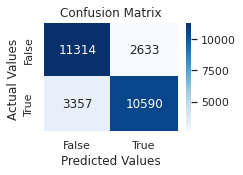

Logloss for Validation:  7.021611028262141
ROC_AUC Score for Validation:  0.8482419885784955
AUC_SCORE:  0.7747676596828168
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      4640
           1       0.44      0.74      0.55       948

    accuracy                           0.80      5588
   macro avg       0.69      0.77      0.71      5588
weighted avg       0.85      0.80      0.81      5588



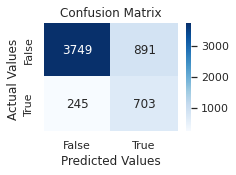






                                   Random Forest Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  0.9999999999999999
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13947
           1       1.00      1.00      1.00     13947

    accuracy                           1.00     27894
   macro avg       1.00      1.00      1.00     27894
weighted avg       1.00      1.00      1.00     27894



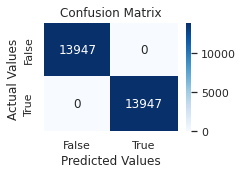

Logloss for Validation:  4.580074229977985
ROC_AUC Score for Validation:  0.8619648443183472
AUC_SCORE:  0.725425123672341
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4640
           1       0.64      0.51      0.57       948

    accuracy                           0.87      5588
   macro avg       0.77      0.73      0.74      5588
weighted avg       0.86      0.87      0.86      5588



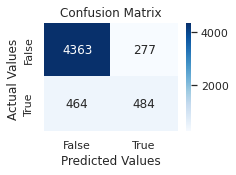

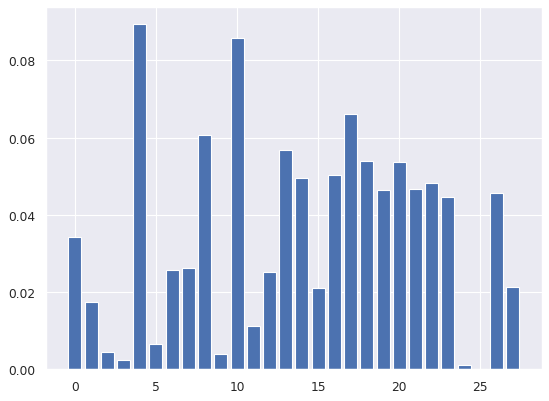






                                   XGBoost Classification: 
Logloss for Train:  6.384304658857526
ROC_AUC Score for Train:  0.8966589292658068
AUC_SCORE:  0.815157381515738
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.80      0.83      0.82     13947
           1       0.83      0.80      0.81     13947

    accuracy                           0.82     27894
   macro avg       0.82      0.82      0.82     27894
weighted avg       0.82      0.82      0.82     27894



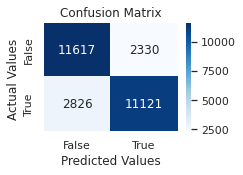

Logloss for Validation:  6.477680840765975
ROC_AUC Score for Validation:  0.8636036165066201
AUC_SCORE:  0.7846700858431545
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      4640
           1       0.47      0.74      0.57       948

    accuracy                           0.81      5588
   macro avg       0.70      0.78      0.73      5588
weighted avg       0.86      0.81      0.83      5588



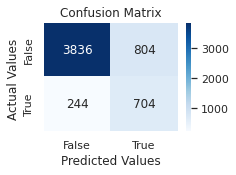

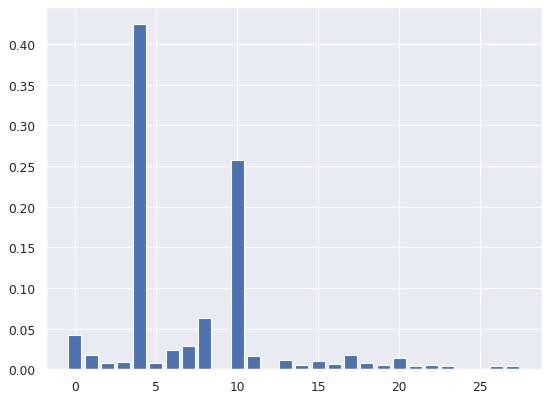






                                   AdaBoost Classification: 
Logloss for Train:  6.750818353025313
ROC_AUC Score for Train:  0.886273524839441
AUC_SCORE:  0.804545780454578
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.79      0.83      0.81     13947
           1       0.82      0.78      0.80     13947

    accuracy                           0.80     27894
   macro avg       0.81      0.80      0.80     27894
weighted avg       0.81      0.80      0.80     27894



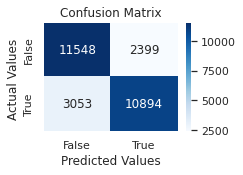

Logloss for Validation:  6.700196935637074
ROC_AUC Score for Validation:  0.8547206914738834
AUC_SCORE:  0.7782727702604394
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      4640
           1       0.46      0.74      0.56       948

    accuracy                           0.81      5588
   macro avg       0.70      0.78      0.72      5588
weighted avg       0.86      0.81      0.82      5588



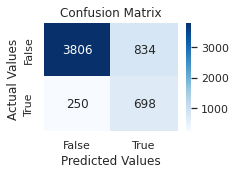

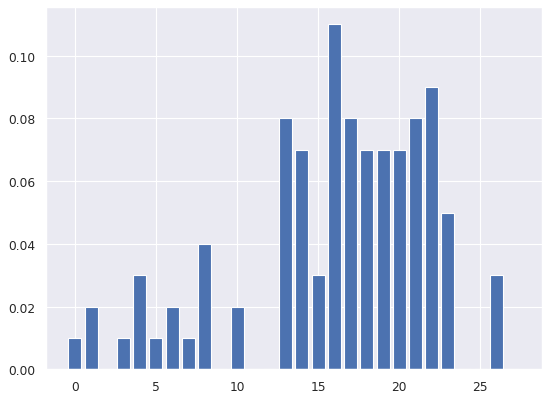






                                   Extra Trees Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  1.0
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13947
           1       1.00      1.00      1.00     13947

    accuracy                           1.00     27894
   macro avg       1.00      1.00      1.00     27894
weighted avg       1.00      1.00      1.00     27894



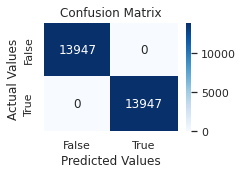

Logloss for Validation:  4.419358812790422
ROC_AUC Score for Validation:  0.8587692556016294
AUC_SCORE:  0.7026271278917504
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      4640
           1       0.69      0.45      0.54       948

    accuracy                           0.87      5588
   macro avg       0.79      0.70      0.73      5588
weighted avg       0.86      0.87      0.86      5588



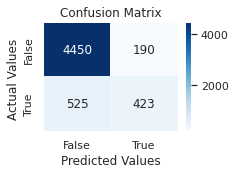

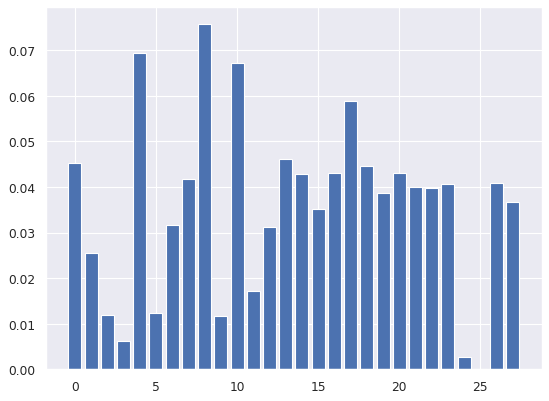






                                   Decision Tree Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  1.0
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13947
           1       1.00      1.00      1.00     13947

    accuracy                           1.00     27894
   macro avg       1.00      1.00      1.00     27894
weighted avg       1.00      1.00      1.00     27894



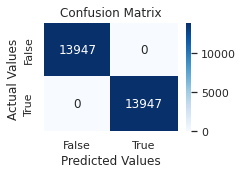

Logloss for Validation:  6.607442903569917
ROC_AUC Score for Validation:  0.6665789138658519
AUC_SCORE:  0.6665789138658519
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4640
           1       0.44      0.45      0.44       948

    accuracy                           0.81      5588
   macro avg       0.66      0.67      0.66      5588
weighted avg       0.81      0.81      0.81      5588



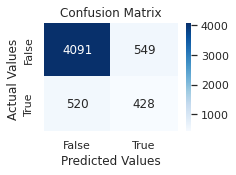

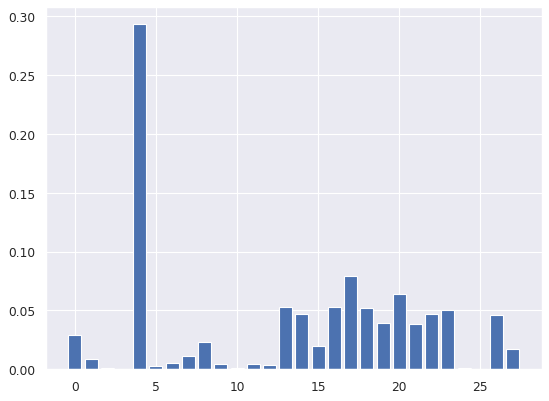






                                   CatBoost Classification: 
Logloss for Train:  2.1198544764967973
ROC_AUC Score for Train:  0.9824964535948809
AUC_SCORE:  0.9386247938624794
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     13947
           1       0.93      0.95      0.94     13947

    accuracy                           0.94     27894
   macro avg       0.94      0.94      0.94     27894
weighted avg       0.94      0.94      0.94     27894



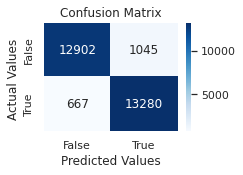

Logloss for Validation:  5.513430549745446
ROC_AUC Score for Validation:  0.857695875163684
AUC_SCORE:  0.7716840353557399
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      4640
           1       0.52      0.67      0.59       948

    accuracy                           0.84      5588
   macro avg       0.73      0.77      0.74      5588
weighted avg       0.86      0.84      0.85      5588



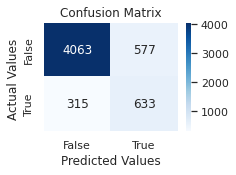

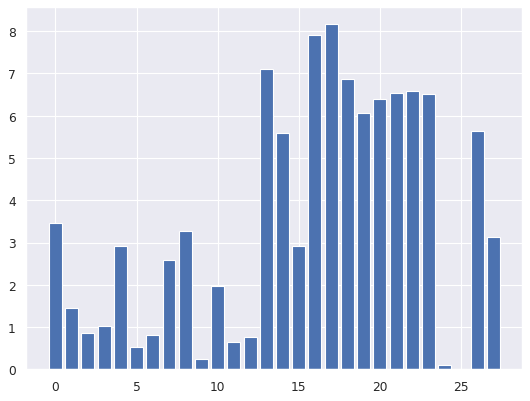






                                   LightGBM Classification: 
Logloss for Train:  3.6317324480121482
ROC_AUC Score for Train:  0.9600191465289096
AUC_SCORE:  0.8948519394851939
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     13947
           1       0.89      0.91      0.90     13947

    accuracy                           0.89     27894
   macro avg       0.90      0.89      0.89     27894
weighted avg       0.90      0.89      0.89     27894



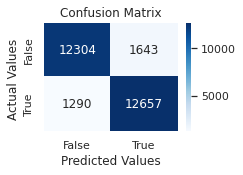

Logloss for Validation:  5.865755212281761
ROC_AUC Score for Validation:  0.8614055907172996
AUC_SCORE:  0.783587498181289
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      4640
           1       0.50      0.71      0.59       948

    accuracy                           0.83      5588
   macro avg       0.72      0.78      0.74      5588
weighted avg       0.86      0.83      0.84      5588



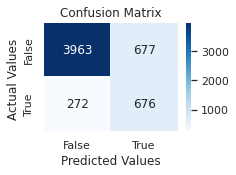

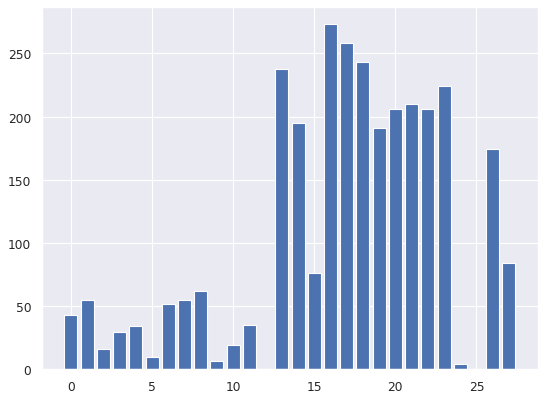

In [ ]:
classification(X_train, y_train, X_val, y_val)

# Oversampling + Scaling + Classical Models Training

In [ ]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.25, random_state=0)
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

#scaling
sc_X = StandardScaler()
X_train[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']] = sc_X.fit_transform(X_train[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']])
X_val[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']] = sc_X.transform(X_val[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']])

                                   Logistic Regression
Logloss for Train:  7.351359690019283
ROC_AUC Score for Train:  0.8641557074308427
AUC_SCORE:  0.7871585287158528
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.77      0.81      0.79     13947
           1       0.80      0.76      0.78     13947

    accuracy                           0.79     27894
   macro avg       0.79      0.79      0.79     27894
weighted avg       0.79      0.79      0.79     27894



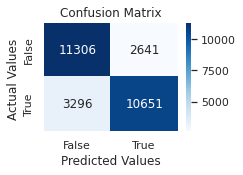

Logloss for Validation:  7.126689480132544
ROC_AUC Score for Validation:  0.8539022715699114
AUC_SCORE:  0.7758734359086279
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.80      0.87      4640
           1       0.44      0.75      0.55       948

    accuracy                           0.79      5588
   macro avg       0.69      0.78      0.71      5588
weighted avg       0.85      0.79      0.81      5588



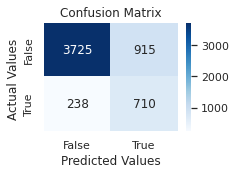






                                   Random Forest Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  0.9999999999999999
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13947
           1       1.00      1.00      1.00     13947

    accuracy                           1.00     27894
   macro avg       1.00      1.00      1.00     27894
weighted avg       1.00      1.00      1.00     27894



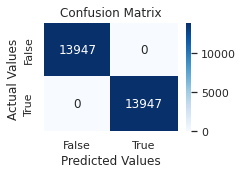

Logloss for Validation:  4.530626447381988
ROC_AUC Score for Validation:  0.8626527717154081
AUC_SCORE:  0.727546195256802
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4640
           1       0.64      0.51      0.57       948

    accuracy                           0.87      5588
   macro avg       0.77      0.73      0.75      5588
weighted avg       0.86      0.87      0.86      5588



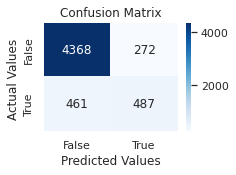

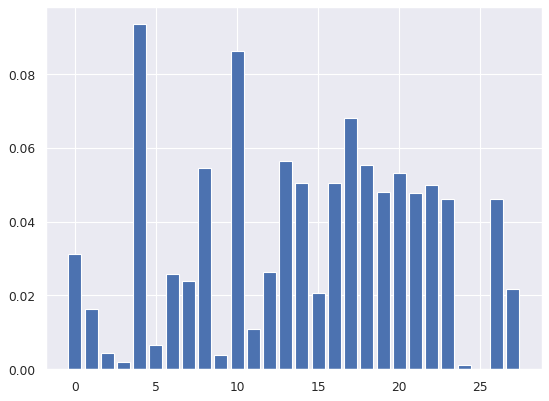






                                   XGBoost Classification: 
Logloss for Train:  6.466027439169161
ROC_AUC Score for Train:  0.8937838910991892
AUC_SCORE:  0.8127912812791281
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.80      0.83      0.82     13947
           1       0.82      0.79      0.81     13947

    accuracy                           0.81     27894
   macro avg       0.81      0.81      0.81     27894
weighted avg       0.81      0.81      0.81     27894



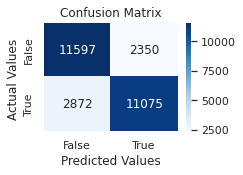

Logloss for Validation:  6.582758577176974
ROC_AUC Score for Validation:  0.861654185763131
AUC_SCORE:  0.783677524370726
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      4640
           1       0.46      0.74      0.57       948

    accuracy                           0.81      5588
   macro avg       0.70      0.78      0.72      5588
weighted avg       0.86      0.81      0.83      5588



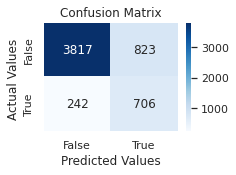

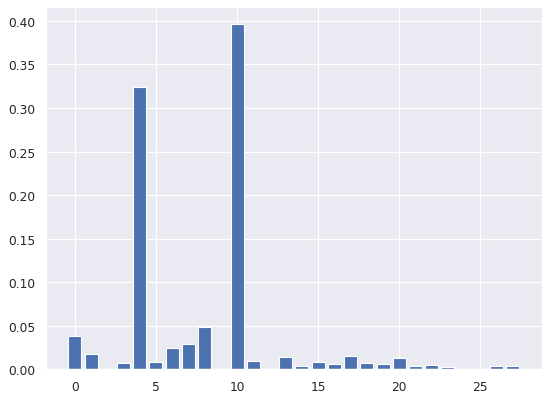






                                   AdaBoost Classification: 
Logloss for Train:  6.890738483062706
ROC_AUC Score for Train:  0.8841682194342451
AUC_SCORE:  0.800494730049473
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.79      0.82      0.80     13947
           1       0.81      0.78      0.80     13947

    accuracy                           0.80     27894
   macro avg       0.80      0.80      0.80     27894
weighted avg       0.80      0.80      0.80     27894



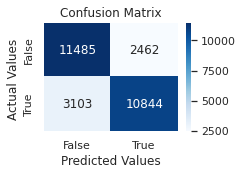

Logloss for Validation:  6.842360115492396
ROC_AUC Score for Validation:  0.8516934471846355
AUC_SCORE:  0.7745353193656337
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.82      0.87      4640
           1       0.45      0.73      0.56       948

    accuracy                           0.80      5588
   macro avg       0.69      0.77      0.71      5588
weighted avg       0.85      0.80      0.82      5588



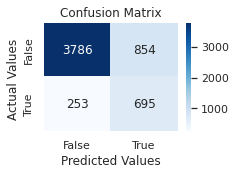

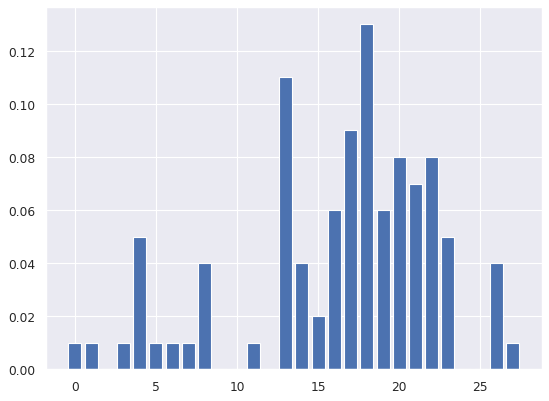






                                   Extra Trees Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  1.0
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13947
           1       1.00      1.00      1.00     13947

    accuracy                           1.00     27894
   macro avg       1.00      1.00      1.00     27894
weighted avg       1.00      1.00      1.00     27894



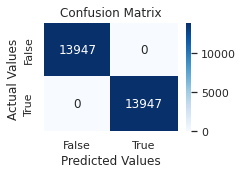

Logloss for Validation:  4.4502625142913885
ROC_AUC Score for Validation:  0.8613571675396479
AUC_SCORE:  0.6978916593918231
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      4640
           1       0.69      0.44      0.53       948

    accuracy                           0.87      5588
   macro avg       0.79      0.70      0.73      5588
weighted avg       0.86      0.87      0.86      5588



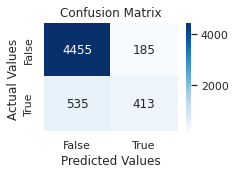

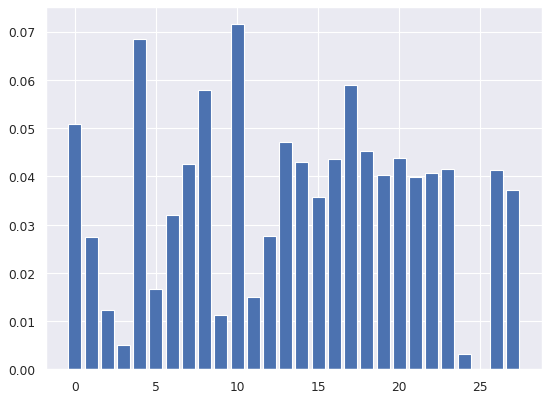






                                   Decision Tree Classification: 
Logloss for Train:  9.992007221626413e-16
ROC_AUC Score for Train:  1.0
AUC_SCORE:  1.0
Classification Report - Train:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13947
           1       1.00      1.00      1.00     13947

    accuracy                           1.00     27894
   macro avg       1.00      1.00      1.00     27894
weighted avg       1.00      1.00      1.00     27894



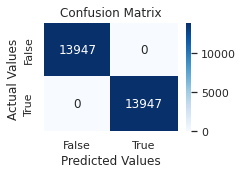

Logloss for Validation:  6.7496067988846455
ROC_AUC Score for Validation:  0.6649398006692856
AUC_SCORE:  0.6649398006692856
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4640
           1       0.43      0.45      0.44       948

    accuracy                           0.80      5588
   macro avg       0.66      0.66      0.66      5588
weighted avg       0.81      0.80      0.81      5588



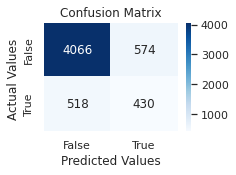

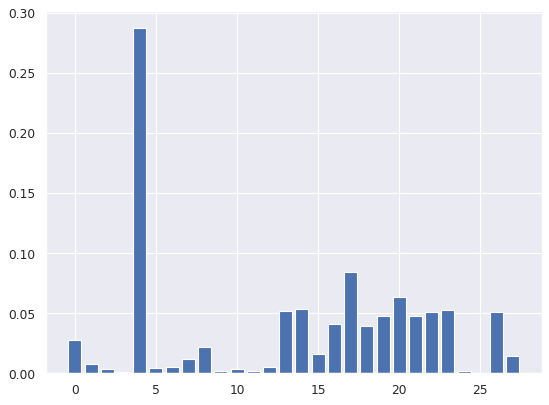






                                   CatBoost Classification: 
Logloss for Train:  2.143381541020205
ROC_AUC Score for Train:  0.9818606898832082
AUC_SCORE:  0.9379436437943645
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.95      0.92      0.94     13947
           1       0.92      0.95      0.94     13947

    accuracy                           0.94     27894
   macro avg       0.94      0.94      0.94     27894
weighted avg       0.94      0.94      0.94     27894



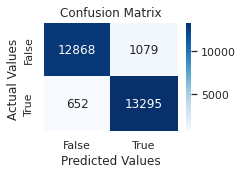

Logloss for Validation:  5.272371947790008
ROC_AUC Score for Validation:  0.8589712461807071
AUC_SCORE:  0.7800832969591154
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      4640
           1       0.54      0.68      0.60       948

    accuracy                           0.85      5588
   macro avg       0.74      0.78      0.75      5588
weighted avg       0.86      0.85      0.85      5588



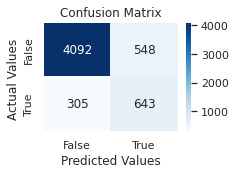

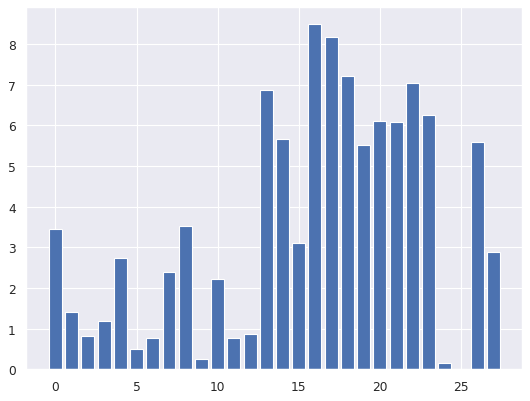






                                   LightGBM Classification: 
Logloss for Train:  3.6725939814958184
ROC_AUC Score for Train:  0.9607484333301671
AUC_SCORE:  0.893668889366889
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     13947
           1       0.88      0.91      0.89     13947

    accuracy                           0.89     27894
   macro avg       0.89      0.89      0.89     27894
weighted avg       0.89      0.89      0.89     27894



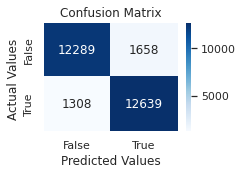

Logloss for Validation:  5.85957475816533
ROC_AUC Score for Validation:  0.860531472792085
AUC_SCORE:  0.7853739269605703
Classification Report - Validation:  
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      4640
           1       0.50      0.72      0.59       948

    accuracy                           0.83      5588
   macro avg       0.72      0.79      0.74      5588
weighted avg       0.86      0.83      0.84      5588



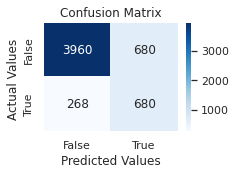

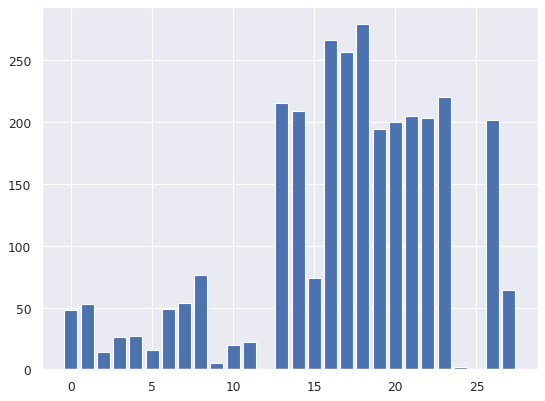

In [ ]:
classification(X_train, y_train, X_val, y_val)

# Test

In [ ]:
#reading the test dataset 
test = pd.read_csv("/content/drive/MyDrive/COMPETITIONS/Robi Datathon 2.0/Data/test.csv.zip")
print(test.shape)
test.head()

(85065, 35)


,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,B,D,D,0,l,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,B,C,B,1,l,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,B,D,B,1,l,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,D,D,B,0,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,D,C,B,1,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0


In [ ]:
#checking the null values in test dataset
test.isna().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       77322
s55       75644
s56       85065
s57       85065
s58           0
s59       85065
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
dtype: int64

In [ ]:
#cheking the unique values and datatypes of the sNUMBER columns
s = [11,12,13,16,17,18,48,52,53,54,55,56,57,58,59,69,70,71]
for i in s:
  S = 's'+str(i)
  print("test-",S,": ",test[S].unique()," ", test[S].dtypes)

test- s11 :  ['Y' 'N']   object
test- s12 :  ['Y' 'N']   object
test- s13 :  [1 0]   int64
test- s16 :  ['B' 'D' 'A' 'C']   object
test- s17 :  ['D' 'C' 'B' 'A']   object
test- s18 :  ['D' 'B' 'C' 'A']   object
test- s48 :  [0 1]   int64
test- s52 :  ['l' '1' '0' 'o']   object
test- s53 :  ['  ' ' ']   object
test- s54 :  [nan 'bb' 'a2' 'aa' 'ab' 'ba' '2b' '22' '2a' 'b2']   object
test- s55 :  [nan 'kk' 'KK' '2k' 'K2' 'Kk' '2K' '22' 'k2' 'kK']   object
test- s56 :  [nan]   float64
test- s57 :  [nan]   float64
test- s58 :  ['B' 'A']   object
test- s59 :  [nan]   float64
test- s69 :  ['~1' 'x' '0' 'C`']   object
test- s70 :  ['op: D' 'op: C' 'op: B' 'op: A']   object
test- s71 :  ['d' 'b' 'c' 'a']   object


In [ ]:
#checking the unique values and datatypes of the nNUMBER columns
for i in range(1,16):
  N = "n" + str(i)
  print("test-",N,": ", test[N].unique()," ", test[N].dtypes,"\n")

test- n1 :  [17.36275238 15.89222807 10.89330326 ...  3.74437962 10.19461514
 10.1096544 ]   float64 

test- n2 :  [2.98528271 2.38905586 1.47090286 ... 0.66132821 1.55786272 1.51792314]   float64 

test- n3 :  [ 3  7  6  8  2  5  4  9  1  0 10]   int64 

test- n4 :  [2.05241485 6.92814181 2.21062948 ... 2.11201639 2.4330862  6.80901748]   float64 

test- n5 :  [-32.33990378 -32.35609176 -32.39787077 ... -32.35116462 -32.36387115
 -32.64455766]   float64 

test- n6 :  [0.02630077 0.01077415 0.01683742 ... 0.01546111 0.0106123  0.02955266]   float64 

test- n7 :  [-9.20017509 -8.89709224 -9.17365981 ... -9.24952927 -9.22915815
 -9.22567083]   float64 

test- n8 :  [2.12296954 1.77088943 1.87187162 ... 1.50554683 1.833286   1.8373383 ]   float64 

test- n9 :  [ 6.64661707 11.04629436  2.80583442 ...  6.43898472  5.38331132
  3.32449026]   float64 

test- n10 :  [4.80122419 6.40722987 5.48121851 ... 3.42992827 6.21255181 4.890686  ]   float64 

test- n11 :  [1.69308685 1.51672784 1.788823

In [ ]:
# Label Encoding

#gender 
mapping1 = {"M":1, "F":0}
test["gender"].replace(mapping1, inplace = True)

#s11, s12
mapping2 = {'Y':1 , 'N':0  }
test['s11'].replace(mapping2,inplace = True)
test['s12'].replace(mapping2,inplace = True)

#s16, s17, s18
mapping3 = {'B':4,'D':3,'A':2,'C':2}
s = [16, 17,18]
for i in s:
  S= 's'+str(i)
  test[S].replace(mapping3, inplace =True)

#s52
mapping4 ={'1':3 ,'l':2, '0':1, 'o':1}
test['s52'].replace(mapping4, inplace=True)

#s58
mapping5= {"B":1, "A":0}
test['s58'].replace(mapping5, inplace = True)

#s69
mapping6 ={'x':3, '~1':2, 'C`':1, '0':1}
test['s69'].replace(mapping6,inplace = True)

#s70
mapping7 = {'op: D':3, 'op: C':2, 'op: B':1, 'op: A':1}
test['s70'].replace(mapping7, inplace= True)

#s71
mapping8 ={'b':3, 'd':2, 'c':1, 'a':1}
test['s71'].replace(mapping8, inplace =True)

In [ ]:
# Dropping Columns that has most null values
s = [53, 54, 55, 56, 57, 59]
for i in s:
  S = 's'+str(i)
  test.drop([S], axis=1, inplace=True)

In [ ]:
# Storing the id column in a variable and dropping id column from the test dataset
id = test["id"]
id = list(id)
test.drop(["id"], axis=1, inplace = True)

In [ ]:
test.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,1,1,1,1,4,3,3,0,2,1,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,1,1,1,1,4,2,4,1,2,0,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,1,1,0,1,4,3,4,1,2,1,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,1,1,1,1,3,3,4,0,3,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,1,1,1,1,3,2,4,1,3,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0


# Sample Submission

In [ ]:
##reading the sample submission 
sample_submission = pd.read_csv("/content/drive/MyDrive/COMPETITIONS/Robi Datathon 2.0/Data/sample_submission.zip")
print(sample_submission.shape)
sample_submission.head()

(100, 2)


,id,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1


# Final Submission

In [ ]:
#final training for final submission
classifier = XGBClassifier(n_estimators=300,random_state=3)
classifier.fit(X_train, y_train)
label = classifier.predict(test)

In [ ]:
#the unique values with counts in the final submission
unique, counts = np. unique(label, return_counts=True)
print(unique)
print(counts)

[0 1]
[21054 64011]


In [ ]:
#merging the id and predicted label for final submission
id_label = list(zip(id, label))
final_submission = pd.DataFrame(id_label, columns = ["id", "label"])
final_submission.head()

,id,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0


In [ ]:
#converting final submission to csv
final_submission.to_csv("Submission_Datacon_5n57gt.csv",index = False)